In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy.matlib

In [2]:
image = cv2.imread('C304B-4-07252017-2K7A2259.JPG',cv2.IMREAD_COLOR)
nrows, ncols, channels = image.shape
print ('nrows')
print (nrows)
print ('ncols')
print (ncols)

nrows
8688
ncols
5792


In [3]:
lab_he = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
ab=lab_he[:,:,1:3]
print (ab.shape)
ab = ab.reshape((nrows*ncols, 2))
print (ab.shape)
nColors=2

(8688, 5792, 2)
(50320896, 2)


[[0]
 [0]
 [0]
 ..., 
 [0]
 [0]
 [0]]
1239482
(8688, 5792)
(8688, 5792, 3, 2)
(8688, 5792, 3)
0
1


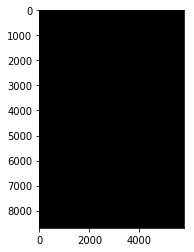

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,2, 20)
flags = (cv2.KMEANS_RANDOM_CENTERS)
ab=np.float32(ab)
_,cluster_idx,cluster_center = cv2.kmeans(ab,nColors,None,criteria,10,flags)
print (cluster_idx)
print(np.count_nonzero(cluster_idx))
mean_cluster_value = np.average(cluster_center, axis=1)
tmp = np.sort(mean_cluster_value)
idx = np.argsort(mean_cluster_value)
pixel_labels = cluster_idx.reshape(nrows,ncols)
print(pixel_labels.shape)
segmentedImages = np.zeros([nrows,ncols,3,nColors])
print(segmentedImages.shape)
rgb_label = np.repeat(pixel_labels[:, :, np.newaxis], 3, axis=2)
print(rgb_label.shape)
for i in range(0,2):
    print (i)
    color = image
    color[rgb_label !=i] = 0
    segmentedImages[:,:,:,i] = color
newImage = segmentedImages[:,:,:,idx[1]]
plt.imshow(newImage)
plt.show()

In [31]:
mean_cluster_value = np.average(cluster_center, axis=1)
tmp = np.sort(mean_cluster_value)
idx = np.argsort(mean_cluster_value)

In [32]:
pixel_labels = cluster_idx.reshape(nrows,ncols)
print(pixel_labels.shape)
segmentedImages = np.zeros([nrows,ncols,3,nColors])
print(segmentedImages.shape)
rgb_label = np.repeat(pixel_labels[:, :, np.newaxis], 3, axis=2)
print(rgb_label.shape)

(8688, 5792)
(8688, 5792, 3, 2)
(8688, 5792, 3)


In [11]:
for i in range(0,2):
    print (i)
    color = image
    color[rgb_label !=i+1] = 0
    segmentedImages[:,:,:,i] = color

0
1


In [14]:
newImage = segmentedImages[:,:,:,1]

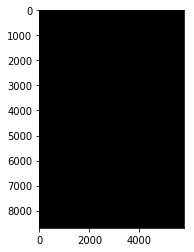

In [15]:
plt.imshow(newImage)
plt.show()

In [17]:
cv2.imwrite('result.png',newImage)
print(newImage.shape)

(8688, 5792, 3)


In [16]:
newImage = newImage.astype('uint8')
temp = newImage[:,:,0]
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(temp,8, cv2.CV_32S)
sizes = stats[:, -1]

max_label = 1
max_size = sizes[1]
for i in range(2, nb_components):
    if sizes[i] > max_size:
        max_label = i
        max_size = sizes[i]
img2 = np.zeros(output.shape)
img2[output == max_label] = 255
cv2.imwrite('result2.ng',img2)
plt.imshow(img2)
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
im=undesired_objects (temp)
print(im.shape)
plt.imshow(im)
plt.show()

In [ ]:
def undesired_objects (image):
    image = image.astype('uint8')
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    img2 = np.zeros(output.shape)
    img2[output == max_label] = 255

